### Training Risk-Aware-VAE

In [1]:
import torch
import matplotlib.pyplot as plt
from dataset import read_mnist
from torch.utils.data.dataloader import DataLoader

In [2]:
# Step 1: load dataset (MNIST) as example
mnist_train, mnist_test = read_mnist('./data')
train_dataloader = DataLoader(mnist_train, batch_size=64, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=64, shuffle=True)

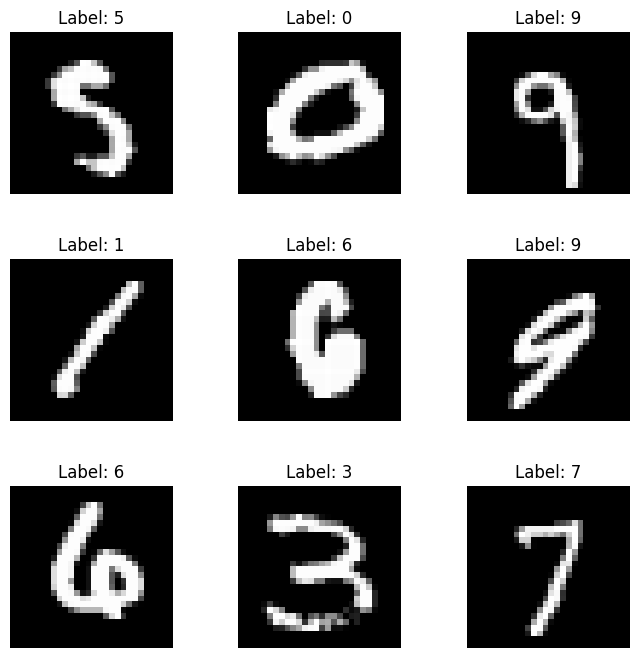

In [3]:
# some visualizations
from utils import visualize_dataset_in_grid
train_features, train_labels = next(iter(train_dataloader))
test_features, test_labels = next(iter(test_dataloader))

visualize_dataset_in_grid(train_features, train_labels)

In [4]:
train_features.shape

torch.Size([64, 1, 28, 28])

In [5]:
# Step 2: create a VNet with vanilla config
from backbone import VAE, vanilla_config

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

vae_model = VAE(28 * 28, 20, vanilla_config, device=device, risk_aware="neutral")

In [6]:
vae_model.fit(mnist_train, mnist_test, epochs=10)

  0%|          | 0/10 [00:04<?, ?it/s]


ValueError: Using a target size (torch.Size([64, 784])) that is different to the input size (torch.Size([64, 400])) is deprecated. Please ensure they have the same size.